<a href="https://colab.research.google.com/github/AeroPace/ME-592/blob/main/PlotResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import zip files

In [42]:
#@AUTHOR: DANIEL PACE
#@DATE: 3/8/2022
#@PURPOSE: This block will mount your google colab drive. Successful execution
#         of the remainder of this code depends on a file structure of...
#         /MyDrive/Colab Notebooks/ME 592/HW2/HW2.ipynb
#         /MyDrive/Colab Notebooks/ME 592/HW2/data/[input_geometry/output_geometry]


import os, sys
from google.colab import drive

# This mouunts your google drive to the current runtime
drive.mount('/content/mnt', force_remount=True)
# We define a notebook path
nb_path = '/content/notebooks'
# We create a symbolic link from our drive's default "Colab Notebooks" folder to nb_path
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
# Insert nb path
sys.path.insert(0, nb_path)

Mounted at /content/mnt


FileExistsError: ignored

In [ ]:
# Copy over the TOP4040.zip file from Google Colab Notebooks
!cp /content/notebooks/TOP4040.zip /content/
!cp /content/notebooks/top-master.zip /content/
!cp /content/notebooks/nn4topopt-master.zip /content/

!unzip TOP4040.zip
!rm TOP4040.zip

# Unzip the top-master.zip file into the Google Colab Session
!unzip top-master.zip
!rm top-master.zip

# Unzip the nn4topopt-master.zip file into the Google Colab Session
!unzip nn4topopt-master.zip
!rm nn4topopt-master.zip

# Moving source files to local run-directory
!mv /content/nn4topopt-master/conv_model.py /content/
!mv /content/nn4topopt-master/data_utils.py /content/
!mv /content/nn4topopt-master/sampler_utils.py /content/
!mv /content/nn4topopt-master/experiments.sh /content/
!mv /content/nn4topopt-master/prepare_data.py /content/
!mv /content/nn4topopt-master/training.py /content/

##Import Python 2.7 module libraries

In [ ]:
!python2.7 -m pip install tensorflow==1.4.1
!python2.7 -m pip install keras==2.1.2
!python2.7 -m pip install h5py

##Prepare TOP4040 dataset

In [9]:
# Prepare the Dataset
!python2.7 /content/prepare_data.py --source TOP4040/ --dataset-path /content/top_dataset.h5

Preparing dataset
TOP4040//* --> /content/top_dataset.h5


##Run Python 2.7 results compiler

In [44]:
!python2.7 results.py

Using TensorFlow backend.
2022-05-12 20:34:58.780009: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
80/80 [==============================] - 42s 520ms/step
DONE
^C


##Un-pickle results and plot

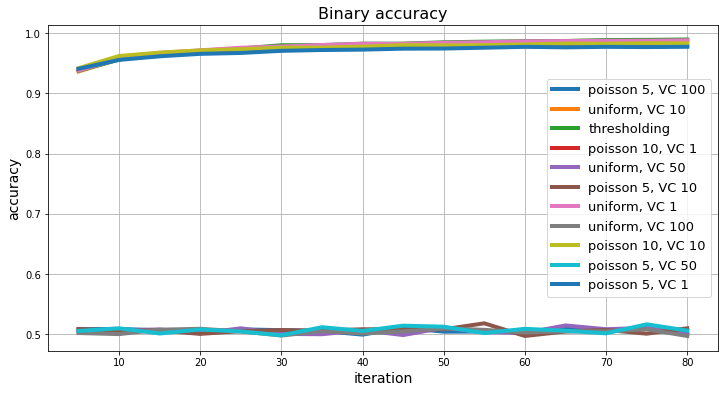

In [45]:
import pickle
import matplotlib.pyplot as plt

iterations = range(5, 85, 5)

with open('saved_dictionary.pkl', 'rb') as f:
  experiments = pickle.load(f, encoding='latin1')

plt.figure(figsize=(12, 6))

for k, v in experiments.items():
    plt.plot(iterations, v['results'], label=k, lw=4)
    
plt.title('Binary accuracy', fontsize=16)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend(loc='best', fontsize=13)
plt.grid()
plt.show()

In [ ]:
for i in iterations:
  print(i)

In [46]:
experiments

{'poisson 10, VC 1': {'model_path': '/content/notebooks/VariationalAutoencoder_2/poisson_10/VOL_COEFF=1.0',
  'results': [0.93888867,
   0.95916307,
   0.9650791,
   0.96924907,
   0.9706982,
   0.9715722,
   0.9729043,
   0.97415626,
   0.97571385,
   0.9762686,
   0.97735345,
   0.9781826,
   0.97772276,
   0.97852725,
   0.9784668,
   0.97881144]},
 'poisson 10, VC 10': {'model_path': '/content/notebooks/VariationalAutoencoder_2/poisson_10/VOL_COEFF=10.0',
  'results': [0.9416045,
   0.9619004,
   0.9674288,
   0.97111034,
   0.9730517,
   0.9755683,
   0.97581637,
   0.9773809,
   0.9798233,
   0.9795537,
   0.97995317,
   0.98099697,
   0.9823946,
   0.98212016,
   0.98300874,
   0.9829404]},
 'poisson 5, VC 1': {'model_path': '/content/notebooks/VariationalAutoencoder_2/poisson_5/VOL_COEFF=1.0',
  'results': [0.9405713,
   0.9554003,
   0.9613174,
   0.96539056,
   0.96688765,
   0.9704053,
   0.9717657,
   0.9724199,
   0.97399026,
   0.974212,
   0.9755791,
   0.97703516,
   0.